#  K- Means Clustering

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Import the iris dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


description of the dataset

In [4]:
print(iris['DESCR'][:200] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive
...


species

In [5]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [6]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(iris['data'].shape)

(150, 4)


In [8]:
# The target field contains what species each entry corresponds to. There are
# three possible species:
# 0 -> Setosa
# 1 -> Versicolor
# 2 -> Viginica
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Visualize the relationship between features

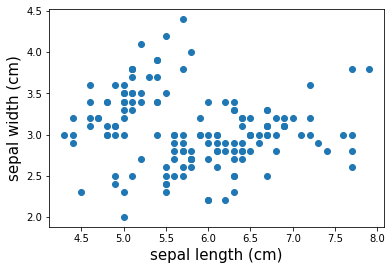

In [10]:
plt.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)', data = iris_df)
plt.xlabel('sepal length (cm)', fontsize=15)
plt.ylabel('sepal width (cm)', fontsize=15)
plt.show()

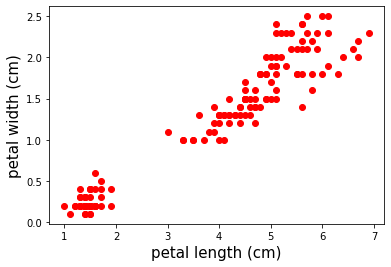

In [11]:
plt.scatter(x = 'petal length (cm)', y = 'petal width (cm)', data = iris_df, color='r')
plt.xlabel('petal length (cm)', fontsize=15)
plt.ylabel('petal width (cm)', fontsize=15)
plt.show()

# Finding the optimum number of clusters for k-means classification using elbow method

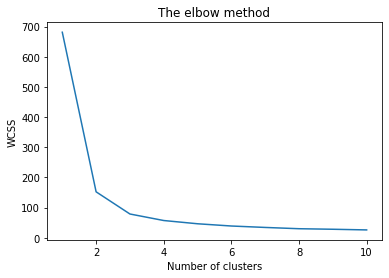

In [12]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Applying kmeans to the dataset / Creating the kmeans classifier

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters - On the first two columns

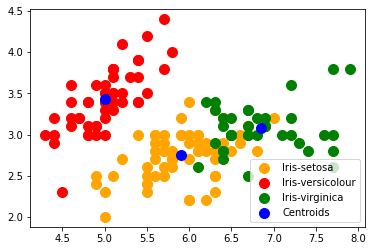

In [14]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'blue', label = 'Centroids')

plt.legend()